In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [ ]:
class SentimentDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.len = len(dataframe)
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __getitem__(self, index):
        text = str(self.data.text[index])
        inputs = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]
        target = self.data.sentiment[index]

        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(target, dtype=torch.long)
        }

    def __len__(self):
        return self.len

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


No checkpoint found, starting from epoch 1


  0%|          | 0/2 [00:00<?, ?it/s]
Epoch 1: 0it [00:00, ?it/s]
Epoch 1: 1it [00:02,  2.30s/it]
Epoch 1: 2it [00:03,  1.64s/it]
Epoch 1: 3it [00:04,  1.43s/it]
Epoch 1: 4it [00:05,  1.32s/it]
Epoch 1: 5it [00:06,  1.27s/it]
Epoch 1: 6it [00:08,  1.24s/it]
Epoch 1: 7it [00:09,  1.23s/it]
Epoch 1: 8it [00:10,  1.22s/it]
Epoch 1: 9it [00:11,  1.21s/it]
Epoch 1: 10it [00:12,  1.20s/it]
Epoch 1: 11it [00:14,  1.20s/it]
Epoch 1: 12it [00:15,  1.20s/it]
Epoch 1: 13it [00:16,  1.20s/it]
Epoch 1: 14it [00:17,  1.20s/it]
Epoch 1: 15it [00:18,  1.20s/it]
Epoch 1: 16it [00:20,  1.20s/it]
Epoch 1: 17it [00:21,  1.20s/it]
Epoch 1: 18it [00:22,  1.21s/it]
Epoch 1: 19it [00:23,  1.21s/it]
Epoch 1: 20it [00:25,  1.21s/it]
Epoch 1: 21it [00:26,  1.22s/it]
Epoch 1: 22it [00:27,  1.22s/it]
Epoch 1: 23it [00:28,  1.22s/it]
Epoch 1: 24it [00:29,  1.22s/it]
Epoch 1: 25it [00:31,  1.23s/it]
Epoch 1: 26it [00:32,  1.23s/it]
Epoch 1: 27it [00:33,  1.23s/it]
Epoch 1: 28it [00:34,  1.23s/it]
Epoch 1: 29it [00:3

Epoch 2, Average Loss: 0.6264663146108355


 50%|█████     | 1/2 [19:37<19:37, 1177.39s/it]

Checkpoint saved at epoch 2



Epoch 2: 0it [00:00, ?it/s]
Epoch 2: 1it [00:01,  1.33s/it]
Epoch 2: 2it [00:02,  1.33s/it]
Epoch 2: 3it [00:04,  1.34s/it]
Epoch 2: 4it [00:05,  1.34s/it]
Epoch 2: 5it [00:06,  1.34s/it]
Epoch 2: 6it [00:08,  1.35s/it]
Epoch 2: 7it [00:09,  1.35s/it]
Epoch 2: 8it [00:10,  1.35s/it]
Epoch 2: 9it [00:12,  1.35s/it]
Epoch 2: 10it [00:13,  1.36s/it]
Epoch 2: 11it [00:14,  1.36s/it]
Epoch 2: 12it [00:16,  1.37s/it]
Epoch 2: 13it [00:17,  1.37s/it]
Epoch 2: 14it [00:18,  1.37s/it]
Epoch 2: 15it [00:20,  1.38s/it]
Epoch 2: 16it [00:21,  1.38s/it]
Epoch 2: 17it [00:23,  1.39s/it]
Epoch 2: 18it [00:24,  1.39s/it]
Epoch 2: 19it [00:25,  1.39s/it]
Epoch 2: 20it [00:27,  1.40s/it]
Epoch 2: 21it [00:28,  1.40s/it]
Epoch 2: 22it [00:30,  1.41s/it]
Epoch 2: 23it [00:31,  1.41s/it]
Epoch 2: 24it [00:33,  1.41s/it]
Epoch 2: 25it [00:34,  1.41s/it]
Epoch 2: 26it [00:35,  1.40s/it]
Epoch 2: 27it [00:37,  1.40s/it]
Epoch 2: 28it [00:38,  1.40s/it]
Epoch 2: 29it [00:40,  1.40s/it]
Epoch 2: 30it [00:41,  

Epoch 3, Average Loss: 0.4579082188110829


100%|██████████| 2/2 [39:20<00:00, 1180.48s/it]


Checkpoint saved at epoch 3


Evaluation: 100%|██████████| 111/111 [00:59<00:00,  1.86it/s]


              precision    recall  f1-score   support

    negative       0.77      0.84      0.80      1001
     neutral       0.79      0.73      0.76      1430
    positive       0.84      0.84      0.84      1103

    accuracy                           0.80      3534
   macro avg       0.80      0.80      0.80      3534
weighted avg       0.80      0.80      0.80      3534



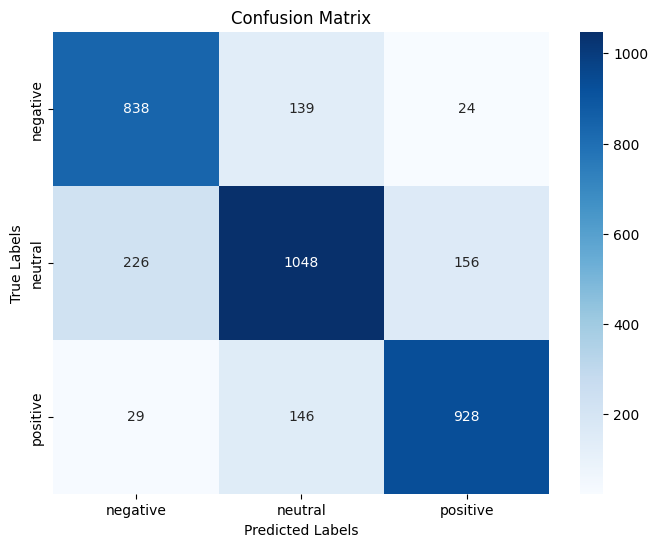

Classification Report:
              precision    recall  f1-score   support

    negative       0.77      0.84      0.80      1001
     neutral       0.79      0.73      0.76      1430
    positive       0.84      0.84      0.84      1103

    accuracy                           0.80      3534
   macro avg       0.80      0.80      0.80      3534
weighted avg       0.80      0.80      0.80      3534



In [ ]:
class SentimentDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.len = len(dataframe)
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __getitem__(self, index):
        text = str(self.data.text[index])
        inputs = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            truncation=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]
        target = self.data.sentiment[index]

        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(target, dtype=torch.long)
        }

    def __len__(self):
        return self.len

# Load data
test_df = pd.read_csv('/content/test.csv', encoding='unicode_escape')
train_df = pd.read_csv('/content/train.csv', encoding='latin1')

# Mapping sentiment categories
sentiment_category_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
train_df['sentiment'] = train_df['sentiment'].map(sentiment_category_mapping)
test_df['sentiment'] = test_df['sentiment'].map(sentiment_category_mapping)

# Dropping NaN values
test_df.dropna(inplace=True)

# Parameters
MAX_LEN = 256
TRAIN_BATCH_SIZE = 32
VALID_BATCH_SIZE = 32
CHECKPOINT_PATH = 'bert_model_checkpoint.pth'

# Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Data loaders
train_dataset = SentimentDataset(train_df, tokenizer, MAX_LEN)
train_loader = DataLoader(train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True)

test_dataset = SentimentDataset(test_df, tokenizer, MAX_LEN)
test_loader = DataLoader(test_dataset, batch_size=VALID_BATCH_SIZE, shuffle=False)

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)
model.to(device)

# Optimizer
optimizer = AdamW(model.parameters(), lr=1e-5)

# Training loop
def train(epoch):
    model.train()
    running_loss = 0.0

    for batch_idx, data in tqdm(enumerate(train_loader), desc=f"Epoch {epoch}"):
        ids = data['ids'].to(device)
        mask = data['mask'].to(device)
        token_type_ids = data['token_type_ids'].to(device)
        targets = data['targets'].to(device)

        optimizer.zero_grad()
        outputs = model(ids, mask, token_type_ids, labels=targets)
        loss = outputs[0]
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    average_loss = running_loss / len(train_loader)
    print(f"Epoch {epoch + 1}, Average Loss: {average_loss}")

    # Save checkpoint
    save_checkpoint(epoch, model, optimizer)

# Evaluation function
def evaluate():
    model.eval()
    fin_targets = []
    fin_outputs = []

    with torch.no_grad():
        for data in tqdm(test_loader, desc="Evaluation"):
            ids = data['ids'].to(device)
            mask = data['mask'].to(device)
            token_type_ids = data['token_type_ids'].to(device)
            targets = data['targets'].to(device)

            outputs = model(ids, mask, token_type_ids)
            _, predicted = torch.max(outputs.logits, 1)

            fin_targets.extend(targets.cpu().detach().numpy())
            fin_outputs.extend(predicted.cpu().detach().numpy())

    return fin_targets, fin_outputs

# Save and load checkpoint
def save_checkpoint(epoch, model, optimizer, filename=CHECKPOINT_PATH):
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict()
    }
    torch.save(checkpoint, filename)
    print(f"Checkpoint saved at epoch {epoch + 1}")

def load_checkpoint(model, optimizer, filename=CHECKPOINT_PATH):
    if os.path.isfile(filename):
        checkpoint = torch.load(filename)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        epoch = checkpoint['epoch']
        print(f"Model loaded, Resuming training from epoch {epoch + 1}")
        return epoch + 1
    else:
        print("No checkpoint found, starting from epoch 1")
        return 1

# Load model and optimizer state if exists
start_epoch = load_checkpoint(model, optimizer)

# Training loop
for epoch in tqdm(range(start_epoch, 3)):
    train(epoch)

# Evaluation
targets, outputs = evaluate()
print(classification_report(targets, outputs, target_names=['negative','neutral','positive']))

# Confusion Matrix and Classification Report
conf_matrix = confusion_matrix(targets, outputs)
target_names = ['negative', 'neutral', 'positive']

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print("Classification Report:")
print(classification_report(targets, outputs, target_names=target_names))